In [9]:
import numpy as np
import glob
import os
import cv2
import matplotlib.pyplot as plt
import shutil

In [3]:
# Read filenames in the raw data folder
image_names = []
labels = []
raw_folder = os.path.join(p, f'Thresholded')

for file in glob.glob(f'{raw_folder}/*.jpg'):
	filename = file.split('/')[-1]
	num_colonies = int(filename.split('-')[2].strip().split('.')[0])
	if num_colonies == 0:
		labels.append(0)
	else:
		labels.append(1)
	image_names.append(filename)

image_names = np.array(image_names)
labels = np.array(labels)
print(f"Im shape {image_names.shape}")

Im shape (3743,)


In [4]:
#  Get two arrays with filenames for positive and negative images
pos_im_files = [image_names[i] for i in range(image_names.shape[0]) if labels[i]]
pos_im_files = np.array(pos_im_files)
neg_im_files = [image_names[i] for i in range(image_names.shape[0]) if not labels[i]]
neg_im_files = np.array(neg_im_files)
num_pos = pos_im_files.shape[0]
num_neg = neg_im_files.shape[0]
print(f'There are {num_pos} images with bacteria and {num_neg} without')

There are 315 images with bacteria and 3428 without


In [10]:
#  Copy positive images to a seprate folder
# Set up folder
p = os.path.abspath('.')
pos_folder = os.path.join(p, 'Positive_data')
if not os.path.exists(pos_folder):
    os.mkdir(pos_folder)
    print(f"{pos_folder} created")
else:
    print(f"{pos_folder} already exists")

for file in pos_im_files:
    path_now = os.path.join(raw_folder, file)
    new_path = os.path.join(pos_folder, file)
    shutil.copy(path_now , new_path )

/home/art_usr/source_code/CFU_counter/Positive_data already exists


In [11]:
#  Make array of intensities for positive images
intensities = []
for file in pos_im_files:
    path = os.path.join(raw_folder, file)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    intensities.append(np.sum(img))
intensities = np.array(intensities)

(array([26., 70., 57., 54., 32., 23., 18., 12.,  9.,  3.,  2.,  1.,  2.,
         0.,  2.,  1.,  0.,  0.,  2.,  1.]),
 array([4.71863400e+06, 1.17495080e+07, 1.87803820e+07, 2.58112560e+07,
        3.28421300e+07, 3.98730040e+07, 4.69038780e+07, 5.39347520e+07,
        6.09656260e+07, 6.79965000e+07, 7.50273740e+07, 8.20582480e+07,
        8.90891220e+07, 9.61199960e+07, 1.03150870e+08, 1.10181744e+08,
        1.17212618e+08, 1.24243492e+08, 1.31274366e+08, 1.38305240e+08,
        1.45336114e+08]),
 <BarContainer object of 20 artists>)

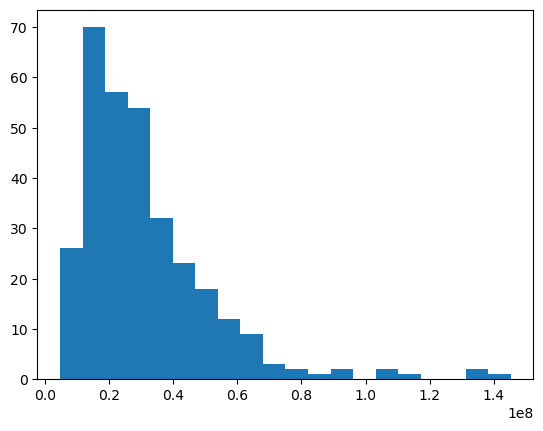

In [6]:
plt.hist(intensities,bins = 20)

In [65]:
#  Move the tail of intensities to a seprate folder
# Set up folder
p = os.path.abspath('.')
gross_folder = os.path.join(p, 'Positive_data', 'gross_contam')
if not os.path.exists(gross_folder):
    os.mkdir(gross_folder)
    print(f"{gross_folder} created")
else:
    print(f"{gross_folder} already exists")

gross_images = []
for file, inten in zip(pos_im_files, intensities):
    path_now = os.path.join(pos_folder, file)
    new_path = os.path.join(gross_folder, file)
    if inten > 0.5e+8 and not os.path.exists(new_path):
        gross_images.append(new_path)
        os.rename(path_now, new_path)
print(gross_images)

/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam already exists
[]


# Maully clean up the folder
## Gross conatamination: 
## - very large colonies or 
## - conluence so high that can not colunt

In [80]:
gross_images = []
for file in glob.glob(f'{gross_folder}/*.jpg'):
	gross_images.append(file)
print (gross_images)

['/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/93e6fbfa1514fcd22d2871e5f3320138-272-1.jpg', '/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/cb2b148fe830f3ae86f43be1d5ba7179-271-40.jpg', '/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/7fa1449310cc2692a864e4fbf5db71bf-246-1.jpg', '/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/2947aee8250f50091f1b0b5e3787302b-317-1.jpg', '/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/f9cbdd4d204bd9d53478dd73e3ed42a0-169-1.jpg', '/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/ba35515df9e0287cc011d74b8043abaa-174-12.jpg', '/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/7fd51e48fab0ec9e82715740fe55d3c8-169-50.jpg', '/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/3e68fe2f88b9e49e225fa61763878415-266-1.jpg', '/home/art_usr/source_code/CFU_counter/Positive_data/gross_contam/6d3d07a790225a39e6e907231719febf-265-3.jpg

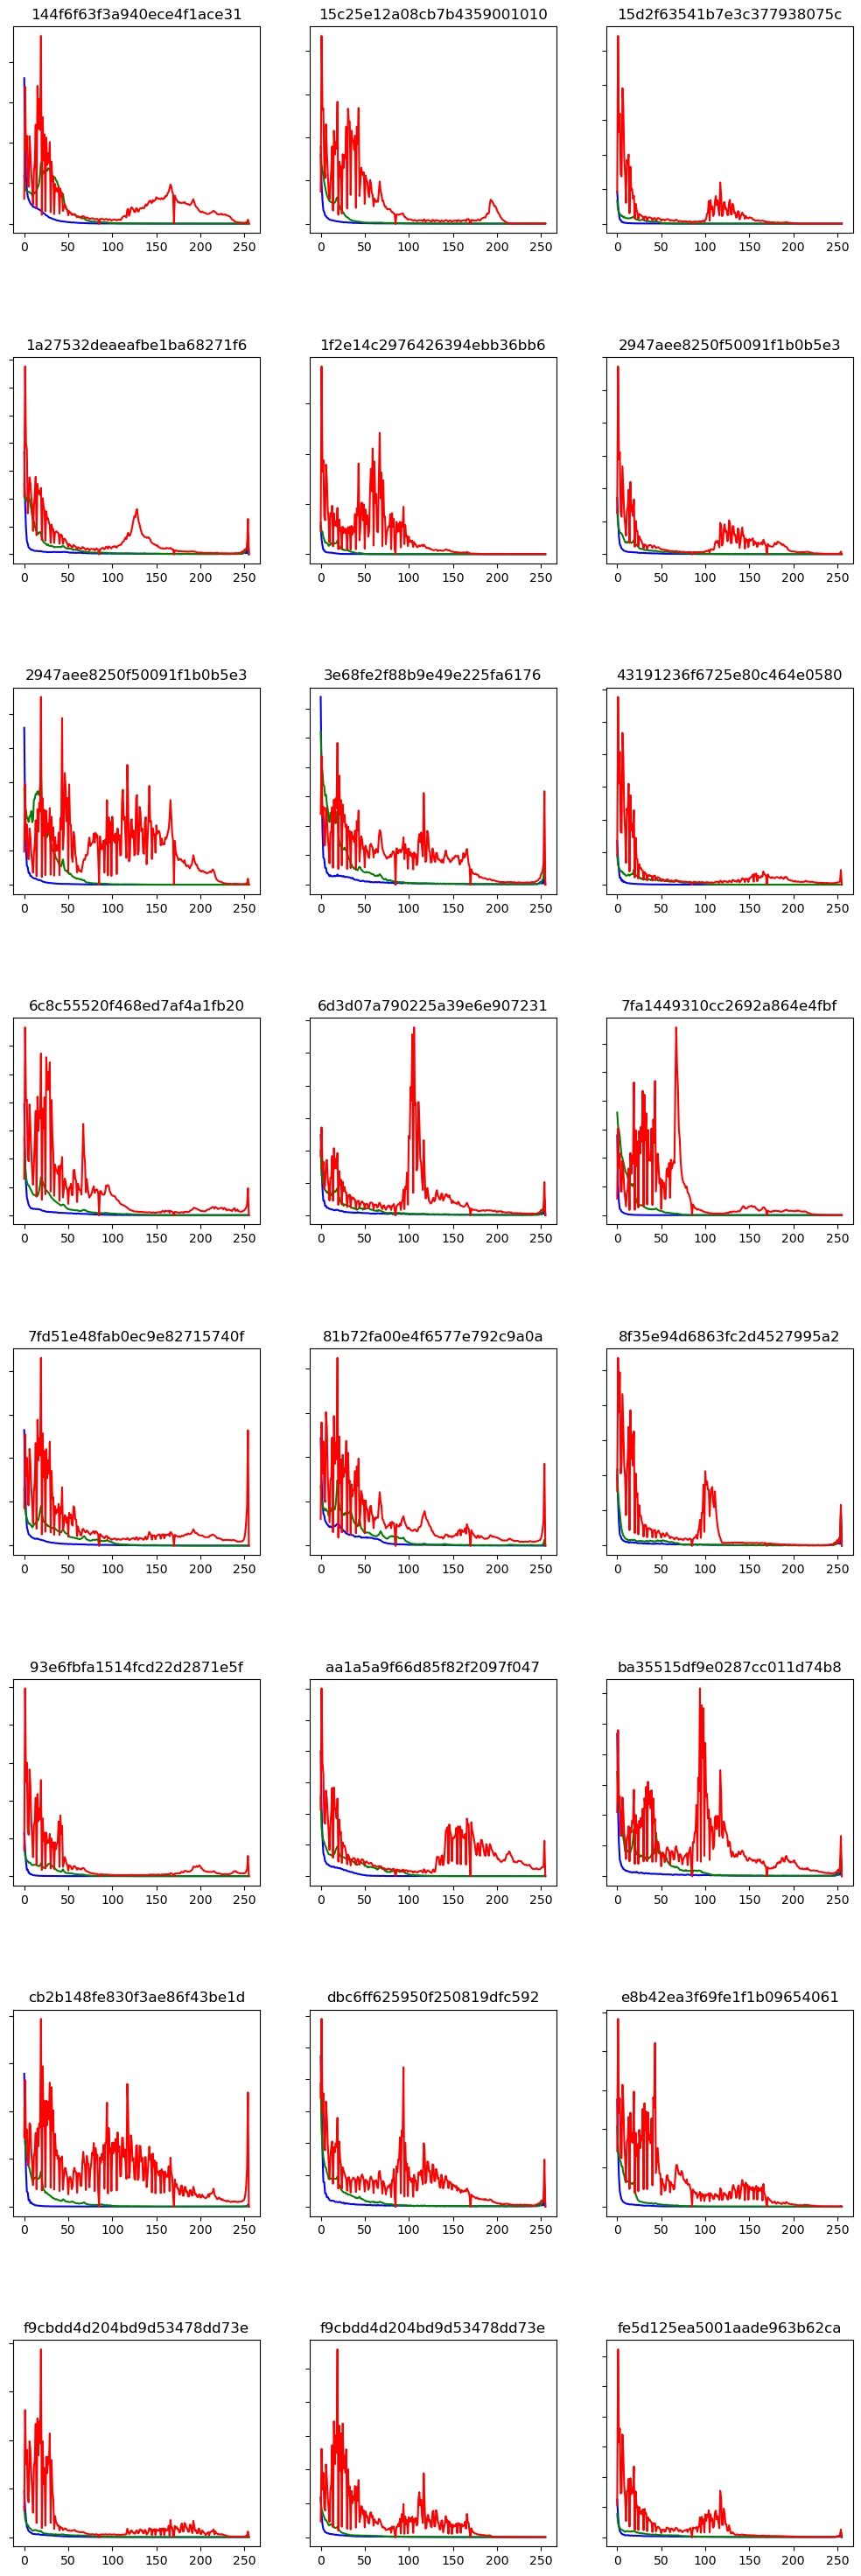

In [81]:
# Visualize histograms for the first 25 images


gross_images.sort()
num_col = 3
num_row = 8
fig, axs = plt.subplots(nrows=num_row, ncols=num_col, figsize=(12,36))

for i, j in [(i,j) for i in np.arange(num_col) for j in np.arange(num_row)]:
    idx = num_col*j+i
    if idx < len(gross_images):
        path = os.path.join(gross_folder, gross_images[idx])
        img = cv2.imread(gross_images[idx], cv2.IMREAD_COLOR)
        # split the image into blue, green and red channels
        channels = cv2.split(img)
        colors = ("b", "g", "r")
        # loop over the image channels
        for (channel, color) in zip(channels, colors):
            # compute the histogram for the current channel and plot it
            hist = cv2.calcHist(images = [channel], channels=[0], mask = None, histSize=[256], ranges = [3, 256])
            axs[j,i].plot(hist, color=color)
            title = gross_images[idx].split('/')[-1].split('.')[0][:25]
            axs[j,i].set_title(title)
            axs[j,i].yaxis.set_tick_params(labelleft=False)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.6)
plt.show()